In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

C:\Users\User\AppData\Local\Temp\ipykernel_11364\3008205165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from utils import gen_correlation_plot, gen_med_service_correlation_plot, merge_professionals_and_population, count_professionals_by_authority

In [4]:
data_dir = os.getcwd()

In [5]:
local_auth_table = pd.read_excel(os.path.join(data_dir, "local_auth_small.xlsx"))
local_auth_table["total_children"] = local_auth_table["סה\"כ  אוכלוסייה בסוף השנה"]*local_auth_table["בני 17-0"]/100
local_auth_table["total_elders"] = local_auth_table["סה\"כ  אוכלוסייה בסוף השנה"]*local_auth_table["בני 65 ומעלה"]/100
local_auth_table = local_auth_table.set_index("שם  הרשות")
local_auth_table.head()

,"סה""כ אוכלוסייה בסוף השנה",בני 65 ומעלה,בני 17-0,total_children,total_elders
שם הרשות,,,,,
אום אל-פחם,56777,4.658577,36.159008,20530.0,2645.0
אופקים,32555,8.732914,36.937490,12025.0,2843.0
אור יהודה,36770,13.459342,28.264890,10393.0,4949.0
אור עקיבא,19447,14.305548,28.040315,5453.0,2782.0
אילת,52519,10.921762,24.973819,13116.0,5736.0


In [6]:
med_serv_table = pd.read_csv(os.path.join(data_dir, "med_serv_isr2.csv"), header=1).set_index("עיר")
print(med_serv_table.shape)
med_serv_table.head()

(75883, 6)


,קופת חולים,סוג שירות,סוג התמחות,שם,טלפון,כתובת
עיר,,,,,,
אבו סנאן,לאומית,שירותי סל,אורולוגיה,דר ברבארה יוסף,04-9561308,אבו סנאן
אבו סנאן,לאומית,שירותי סל,אורתופדיה,דר סעיד ראיק,04-9561308,אבו סנאן
אבו סנאן,לאומית,שירותי סל,אנדוקרינולוגיה,דר עאסלה מוסטפא,04-9561308,אבו סנאן
אבו סנאן,לאומית,שירותי סל,אף אוזן וגרון,דר סעב באסם,04-9996489,אבו סנאן
אבו סנאן,לאומית,שירותי סל,בית מרקחת,אבו סנאן,04-9969282,אבו סנאן


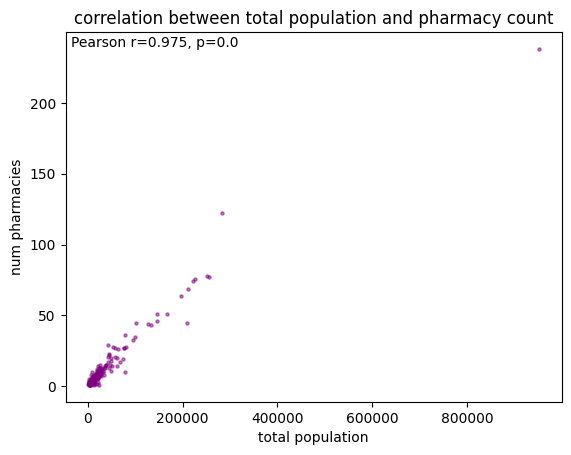

In [9]:
local_auth_population_col = "סה\"כ  אוכלוסייה בסוף השנה"
profession = "בית מרקחת"
plot_kwargs = {"alpha": 0.5, "s": 5, "color": "purple"}
xlabel = "total population"
ylabel = "num pharmacies"
title = "correlation between total population and pharmacy count"

ax = gen_med_service_correlation_plot(med_serv_table=med_serv_table, local_auth_table=local_auth_table,
                                local_auth_population_col=local_auth_population_col,
                                profession=profession, kupa=None,
                                     xlabel=xlabel, ylabel=ylabel, title=title, print_corr=True,
                                     **plot_kwargs)